In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/dongdongsun/Desktop/NYU CDS/1001/Porject2/movieReplicationSet.csv")

### 1 Dimension Reduction

In [3]:
report = df.iloc[:,420:474]
for col in report.columns:
    ave = report[col].mean()
    report[col].fillna(value=ave, inplace=True)

In [4]:
from sklearn.preprocessing import StandardScaler
# x = StandardScaler().fit_transform(report.values)
x = StandardScaler().fit_transform(report)
np.mean(x),np.std(x),x.shape

(6.5371179139953174e-18, 1.0, (1097, 54))

Text(0, 0.5, 'Eigenvalues')

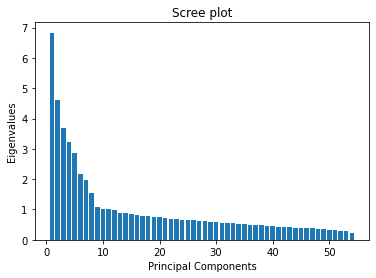

In [5]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
eigValues = pca.explained_variance_ 
loadings = pca.components_ *-1
origDataNewCoordinates = pca.fit_transform(x) *-1

# Scree plot:
numPredictors = 54
plt.bar(np.linspace(1,numPredictors,numPredictors),eigValues)
plt.title('Scree plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
#8

In [6]:
# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(report),columns = report.columns) 

# PCA
pca = PCA(n_components=8)
pca.fit_transform(data_scaled)

# Dump components relations with features:
pd.DataFrame(pca.components_,columns=data_scaled.columns
             ,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

,Is talkative,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,Is curious about many different things,...,I have cried during a movie,I have trouble following the story of a movie,I have trouble remembering the story of a movie a couple of days after seeing it,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching
PC-1,-0.179161,0.104341,-0.185441,0.186837,-0.171622,0.145237,-0.172147,0.108962,-0.163193,-0.156580,...,-0.035092,0.084141,0.097866,-0.025568,-0.036614,0.096660,-0.051669,-0.067044,-0.033663,0.029788
PC-2,-0.098106,-0.075461,-0.042610,-0.186114,-0.130195,-0.007824,-0.020476,-0.089866,0.188263,-0.152879,...,-0.182766,-0.080070,-0.033766,-0.152667,-0.214637,-0.112520,-0.246836,-0.229220,-0.182308,-0.163787
PC-3,0.292285,0.072772,-0.151800,-0.085922,-0.048972,-0.339960,-0.117712,0.157611,0.015291,-0.064992,...,0.036839,0.108575,0.101145,0.104835,0.053249,0.087079,0.002635,-0.018281,0.017423,0.061303
PC-4,-0.070939,-0.223660,-0.252321,-0.077102,0.024803,0.010593,0.111031,0.144997,0.153181,0.014254,...,0.000095,0.040107,0.028158,-0.024348,0.056157,0.065284,0.057133,0.070330,0.094643,0.067103
PC-5,-0.042244,0.128557,-0.083297,0.062609,0.239820,0.032211,-0.132018,0.163531,0.120320,0.177767,...,-0.195022,-0.236036,-0.176852,-0.111666,-0.080437,-0.197502,-0.174131,-0.054449,-0.050981,-0.134980
PC-6,-0.085082,-0.057953,-0.019200,0.065927,0.065385,-0.148042,-0.140046,-0.249105,-0.109490,-0.000902,...,0.174159,-0.099834,-0.083139,0.095093,0.192465,-0.062771,0.164651,0.163694,0.101615,0.106410
PC-7,0.135596,-0.019010,-0.057278,0.057091,-0.022059,-0.102814,0.058769,-0.039940,-0.260378,0.071870,...,0.005108,-0.191198,-0.266590,-0.199899,-0.221310,-0.321089,-0.139552,-0.189027,-0.249619,-0.217010
PC-8,-0.030795,-0.022618,0.026693,0.077694,0.213633,-0.024229,-0.014106,-0.118081,-0.087903,0.008145,...,-0.227056,0.423699,0.366583,-0.006679,-0.185226,0.356958,-0.250705,-0.307551,-0.115537,-0.037603


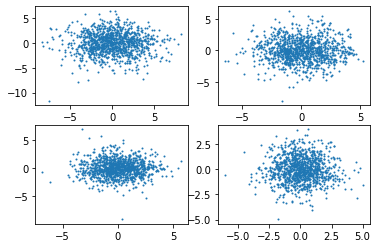

In [7]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(origDataNewCoordinates[:,0],origDataNewCoordinates[:,1],'o',markersize=1)

axis[0, 1].plot(origDataNewCoordinates[:,2],origDataNewCoordinates[:,3],'o',markersize=1)

axis[1, 0].plot(origDataNewCoordinates[:,4],origDataNewCoordinates[:,5],'o',markersize=1)

axis[1, 1].plot(origDataNewCoordinates[:,6],origDataNewCoordinates[:,7],'o',markersize=1)

## 2 Clustering

In [8]:
X = origDataNewCoordinates[:,0:8]
X.shape

(1097, 8)

In [9]:
# Silhouette: How similar to points in cluster vs. others, arbitrariness
numClusters = 18 # how many clusters are we looping over? (from 8 to 18)
Q = np.empty([numClusters,1]) # init container to store sums
Q[:] = np.NaN # convert to NaN

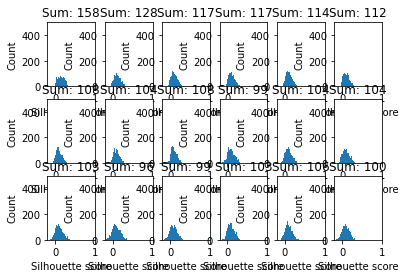

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
# Compute kMeans:
for ii in range(2, 20): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(X) # compute kmeans
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(X,cId) # compute the mean silhouette coefficient of all samples
    # print(s.shape)
    Q[ii-2] = sum(s) # take sum
    # Plot data:
    plt.subplot(3,6,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,500)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer


Text(0, 0.5, 'Sum of silhouette scores')

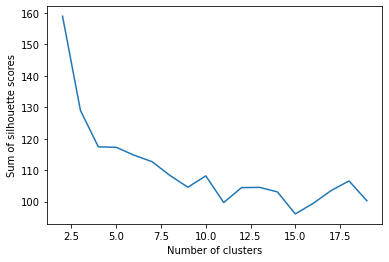

In [11]:
#%% Plot this to make it clearer what is going on
plt.plot(np.linspace(2,19,numClusters),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
# kMeans gives you the center coordinates of the clusters, assuming a number
# of clusters. Silhouette gives you how many are most unamigously described
# by the clusters. Most likely "real" number: Where the sum of the
# silhouette scores peaks. In reality, they are complementary. Use together

optimal number of clusters = 2

In [12]:
kMeans = KMeans(n_clusters = 2).fit(X) # compute kmeans
cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
s = silhouette_samples(X,cId) # compute the mean silhouette coefficient of all samples

cluster_0 = [i for i in range(len(kMeans.labels_)) if kMeans.labels_[i] == 0 ]
cluster_1 = [i for i in range(len(kMeans.labels_)) if kMeans.labels_[i] == 1 ]

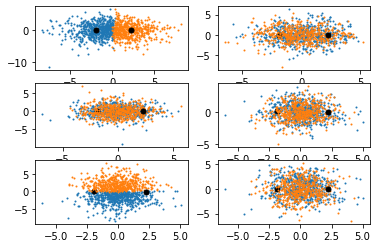

In [13]:
figure, axis = plt.subplots(3, 2)
indexVector = np.linspace(1,len(np.unique(cId)),len(np.unique(cId))) 
for ii in indexVector:
    plotIndex = np.argwhere(cId == int(ii-1))

    axis[0, 0].plot(origDataNewCoordinates[plotIndex,0],origDataNewCoordinates[plotIndex,1],'o',markersize=1)
    axis[0, 0].plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  

    axis[0, 1].plot(origDataNewCoordinates[plotIndex,2],origDataNewCoordinates[plotIndex,3],'o',markersize=1)
    axis[0, 1].plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    
    axis[1, 0].plot(origDataNewCoordinates[plotIndex,4],origDataNewCoordinates[plotIndex,5],'o',markersize=1)
    axis[1, 0].plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    
    axis[1, 1].plot(origDataNewCoordinates[plotIndex,6],origDataNewCoordinates[plotIndex,7],'o',markersize=1)
    axis[1, 1].plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    
    axis[2, 0].plot(origDataNewCoordinates[plotIndex,6],origDataNewCoordinates[plotIndex,0],'o',markersize=1)
    axis[2, 0].plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    
    axis[2, 1].plot(origDataNewCoordinates[plotIndex,6],origDataNewCoordinates[plotIndex,2],'o',markersize=1)
    axis[2, 1].plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  

## 4 Random Forest Classifier

In [17]:
# from sklearn.preprocessing import label_binarize

X_train = np.concatenate((X.astype(int),np.expand_dims(cId, -1).astype(int)), axis=1)
Y_train = df.iloc[:,0:400]
for col in Y_train.columns:
    ave = Y_train[col].median()
    Y_train[col].fillna(value=ave, inplace=True)

Y_train = Y_train.apply(np.floor).astype(int)
Y_train = np.array(Y_train)

In [27]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 4)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 400, 700, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 40, 70, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
train_loss, test_loss = [],[]
kf = KFold(n_splits= 5 ,shuffle=True)

for train_index, test_index in kf.split(X):
    x_train, x_test = X_train[train_index], X_train[test_index]
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    
    model = RandomForestClassifier()
    rf_GridSearch = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 3, n_jobs = -1).fit(x_train, y_train)
    y_pred = rf_GridSearch.predict(x_test)
    y_pred_train = rf_GridSearch.predict(x_train)

    train_loss_fold, test_loss_fold = [],[]
    for i in range(x_train.shape[0]):
        train_loss_fold.append(accuracy_score(y_train[i,:],y_pred_train[i,:]))
        
    for i in range(x_test.shape[0]):
        test_loss_fold.append(accuracy_score(y_test[i,:],y_pred[i,:]))
        
    test_loss.append(sum(test_loss_fold)/x_test.shape[0])
    train_loss.append(sum(train_loss_fold)/x_train.shape[0])

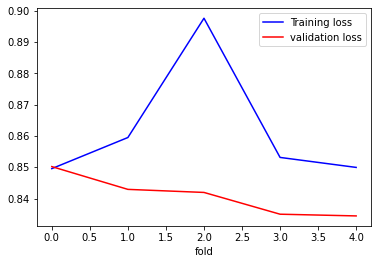

In [29]:
plt.plot(range(5), train_loss, 'blue', label='Training ACC')
plt.plot(range(5), test_loss, "red", label='validation ACC')
plt.xlabel("fold")
plt.legend()

## 5

In [48]:
import torch.nn as nn
import torch.nn.functional as F
import torch

In [49]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 1024)
        self.fc5 = nn.Linear(1024, 512)
        self.fc6 = nn.Linear(512, 400)
        self.bn1 = nn.BatchNorm1d(128)
        self.bn2 = nn.BatchNorm1d(512)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        x = self.bn2(x)
        
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x
net = Net()

In [50]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
class MovieDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx].float(),self.y[idx].float()
    

In [51]:
X_train = np.concatenate((X.astype(int),np.expand_dims(cId, -1).astype(int)), axis=1)
Y_train = df.iloc[:,0:400]
for col in Y_train.columns:
    ave = Y_train[col].median()
    Y_train[col].fillna(value=ave, inplace=True)

Y_train = Y_train.apply(np.floor).astype(int)
Y_train = torch.from_numpy(np.array(Y_train))
X_train = torch.from_numpy(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)
train_ds = MovieDataset(X_train, y_train)
valid_ds = MovieDataset(X_test, y_test)
batch_size = 128
train_dataloader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(valid_ds, batch_size=batch_size, shuffle=True)

In [52]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay = 0.1)

In [53]:
def val_eval(model, valid_dl):
    model.eval()
    running_loss = 0.0
    correct = 0
    for x, y in valid_dl:
        current_batch_size = y.shape[0]
        outputs = net(x)
        loss = criterion(outputs, y)
        running_loss += loss.item()
        correct += (torch.round(outputs) == y).float().sum().item()/400
        
    print("valid loss %.3f and accuracy %.3f" % (running_loss/(len(test_dataloader)*batch_size), correct/(len(test_dataloader)*batch_size)))
    return running_loss//(len(test_dataloader)*batch_size), correct//(len(test_dataloader)*batch_size)

In [54]:
from sklearn.model_selection import train_test_split


n_epoch = 200
for epoch in range(n_epoch):
    correct = 0
    for x,y in train_dataloader:

        running_loss = 0.0
        optimizer.zero_grad()
        outputs = net(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        correct += (torch.round(outputs) == y).float().sum().item()/400
        
    if epoch % 10 == 9:   
        print("Epoch: ",epoch+1)
        print("Train loss %.5f and accuracy %.5f" % (running_loss/(len(train_dataloader)*batch_size), correct/(len(train_dataloader)*batch_size)))
        running_loss = 0.0
        val_eval(net, test_dataloader)
print('Finished Training')

Epoch:  10
Train loss 0.00035 and accuracy 0.76373
valid loss 0.005 and accuracy 0.325
Epoch:  20
Train loss 0.00035 and accuracy 0.80944
valid loss 0.002 and accuracy 0.723
Epoch:  30
Train loss 0.00038 and accuracy 0.78316
valid loss 0.002 and accuracy 0.715
Epoch:  40
Train loss 0.00030 and accuracy 0.80465
valid loss 0.002 and accuracy 0.724
Epoch:  50
Train loss 0.00034 and accuracy 0.81031
valid loss 0.002 and accuracy 0.724
Epoch:  60
Train loss 0.00037 and accuracy 0.80865
valid loss 0.003 and accuracy 0.716
Epoch:  70
Train loss 0.00027 and accuracy 0.80893
valid loss 0.002 and accuracy 0.725
Epoch:  80
Train loss 0.00029 and accuracy 0.80888
valid loss 0.002 and accuracy 0.724
Epoch:  90
Train loss 0.00032 and accuracy 0.80986
valid loss 0.002 and accuracy 0.725
Epoch:  100
Train loss 0.00024 and accuracy 0.80986
valid loss 0.002 and accuracy 0.725
Epoch:  110
Train loss 0.00025 and accuracy 0.80988
valid loss 0.002 and accuracy 0.724
Epoch:  120
Train loss 0.00035 and accura